## Netflix Insights


## Introduction

Ce projet a pour but d’analyser les données de Netflix (films et séries) datant de septembre 2021. On va explorer la base de données, la nettoyer, visualiser les principales tendances et sortir quelques insights intéressants sur le contenu proposé par la plateforme.


## Sommaire

1. Chargement et aperçu des données  
2. Exploration et nettoyage  
3. Visualisation des données  
4. Observations  
5. Conclusion


In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px



## 1. Chargement et aperçu des données


In [205]:
# Charger le fichier CSV
df = pd.read_csv("netflix_titles.csv")


In [206]:
# Aperçu du haut et du bas du DataFrame
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [207]:
df.tail()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


- infos générales


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [210]:
print("Nombre de lignes :", df.shape[0])
print("Nombre de colonnes :", df.shape[1])


Nombre de lignes : 8807
Nombre de colonnes : 12


In [211]:
print("Nombre de lignes :", df['type'].shape[0])

Nombre de lignes : 8807


In [212]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Liste des colonnes
On récupère ici toutes les colonnes présentes dans le DataFrame. Cela aide à planifier la suite de l’analyse.


In [214]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

## Types des colonnes
On vérifie si les colonnes sont de type numérique ou catégoriel. Cela nous aide à savoir quel type d’analyse et de visualisation est possible pour chaque colonne.


In [216]:
df.isnull().sum() / len(df) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

## Données manquantes
On vérifie s’il y a des valeurs manquantes dans le dataset. On calcule aussi leur proportion pour savoir si on peut les ignorer ou s’il faut les nettoyer.


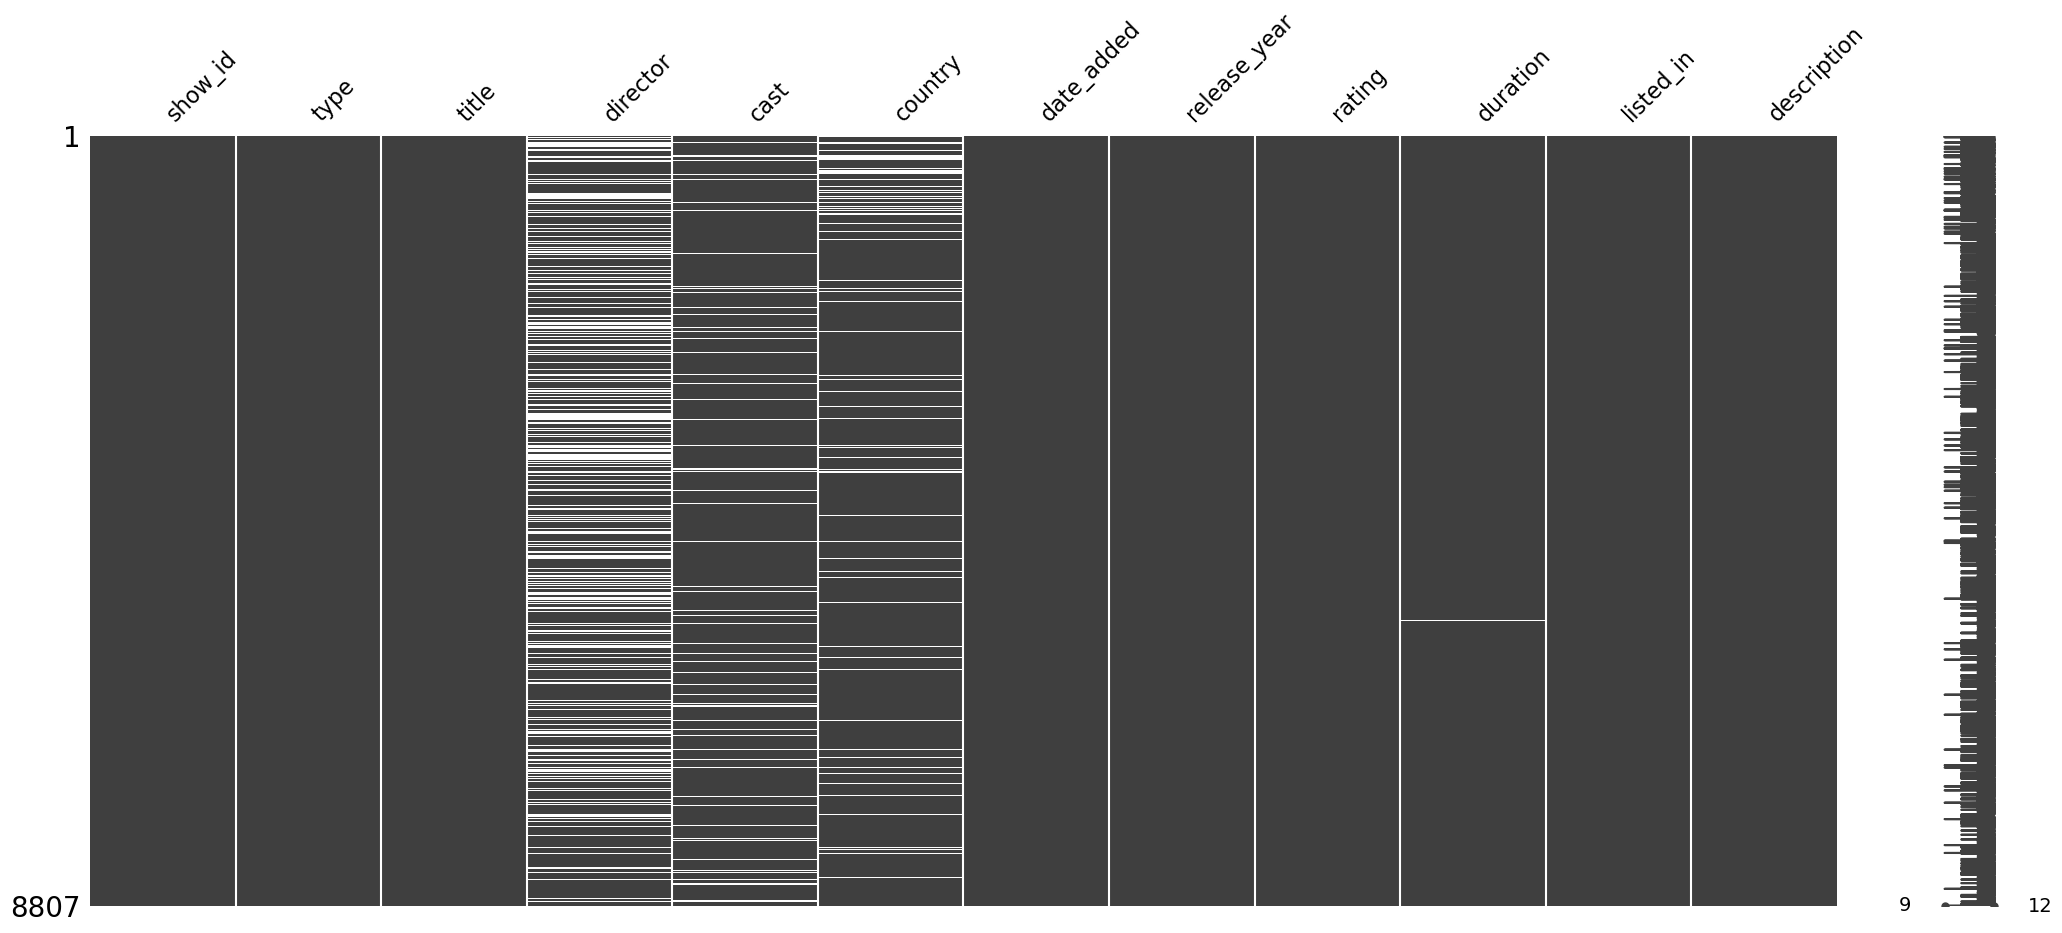

In [218]:
msno.matrix(df)
plt.show()

## Visualisation des valeurs manquantes
On utilise la librairie `missingno` pour représenter graphiquement les colonnes contenant des valeurs nulles. C’est plus visuel que des chiffres bruts.


In [220]:
df.sample(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8661,s8662,Movie,Unfinished Song,Paul Andrew Williams,"Terence Stamp, Gemma Arterton, Christopher Ecc...","United Kingdom, Germany","July 22, 2019",2012,PG-13,94 min,"Comedies, Dramas, Independent Movies","With his wife terminally ill, Arthur's future ..."


## Observation aléatoire
On affiche une ligne aléatoire du dataset pour vérifier la cohérence des données et repérer d’éventuelles anomalies.


In [222]:
df[df['title'] == 'Catch Me If You Can']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","August 1, 2021",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...


## Observation spécifique : Catch Me If You Can
On récupère ici toutes les informations concernant l’œuvre “Catch Me If You Can”. Cela permet de vérifier si les données sont complètes et cohérentes pour un titre spécifique.


In [224]:
df[df['type'] == "Movie"].sort_values("release_year", ascending=False).head(1)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
570,s571,Movie,Dynasty Warriors,Chow Hin Yeung Roy,"Wang Kai, Louis Koo, Han Geng, Tony Yang, Cari...",NaN,"July 1, 2021",2021,TV-14,118 min,"Action & Adventure, International Movies","Warlords, warriors and statesmen wage a battle..."


## Film le plus récent
On filtre ici le dataset pour afficher l’œuvre ayant la date de sortie la plus récente. Cela nous permet de vérifier les données récentes.


In [230]:
df[df['type'] == "TV Show"].sort_values("release_year", ascending=False).head(1)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


## Série la plus récente
De la même manière, on cherche à identifier la série la plus récente en filtrant sur le type ‘TV Show’.


In [ ]:
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

## Conversion de `date_added` en DateTime
Nous convertissons la colonne `date_added` en format DateTime pour faciliter toute analyse temporelle future.


In [236]:
df['duration_movie'] = df[df['type'] == 'Movie']['duration'].str.replace(' min', '').astype(float)


## Conversion de la durée des films en nombre entier
On enlève "min" et on convertit la colonne `duration` pour qu’elle contienne des entiers représentant la durée en minutes.


In [244]:
df_clean = df.copy()
df_clean.loc[df_clean['type'] == 'TV Show', 'duration'] = df_clean[df_clean['type'] == 'TV Show']['duration'].str.replace(' Season', '').str.replace('s', '')
df_clean['duration'] = pd.to_numeric(df_clean['duration'], errors='coerce')


## Conversion de la durée des séries en nombre d’épisodes
On remplace "seasons" par rien et on transforme la colonne `duration` pour qu’elle représente le nombre de saisons des séries.


In [247]:
df['listed_in'] = df['listed_in'].str.split(', ')
df[df['type'] == 'Movie']['listed_in'].head()


0                                       [Documentaries]
6                            [Children & Family Movies]
7     [Dramas, Independent Movies, International Mov...
9                                    [Comedies, Dramas]
12                       [Dramas, International Movies]
Name: listed_in, dtype: object

## Conversion de `listed_in` en liste de genres
On convertit la colonne `listed_in` qui était une chaîne de caractères séparée par des virgules en une liste de genres pour chaque œuvre.


In [256]:
df[['type', 'country', 'release_year', 'rating', 'listed_in']].astype(str).nunique()


type              2
country         749
release_year     74
rating           18
listed_in       514
dtype: int64

## Valeurs uniques des colonnes principales
On vérifie combien de valeurs uniques existent pour les colonnes les plus importantes : `type`, `country`, `release_year`, `rating` et `listed_in`.


In [258]:
df['director'].value_counts()[df['director'].value_counts() > 1]


director
Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Marcus Raboy                  16
Suhas Kadav                   16
Jay Karas                     14
                              ..
Abhijit Panse                  2
Jose Manuel Colón              2
Rhys Thomas                    2
Rizal Mantovani                2
Nawapol Thamrongrattanarit     2
Name: count, Length: 867, dtype: int64

## Réalisateurs ayant produit plusieurs œuvres
Ici, on affiche les réalisateurs ayant dirigé plus d'une œuvre dans le dataset.


In [260]:
df[df['type'] == 'Movie']['release_year'].value_counts().idxmax()


2017

## L’année avec le plus de films ajoutés
On cherche l’année avec le plus grand nombre de films ajoutés à Netflix dans le dataset.


In [262]:
df[df['type'] == 'TV Show']['release_year'].value_counts().idxmax()


2020

## L’année avec le plus de séries ajoutées
De manière similaire, on trouve l’année où le plus grand nombre de séries ont été ajoutées à Netflix.



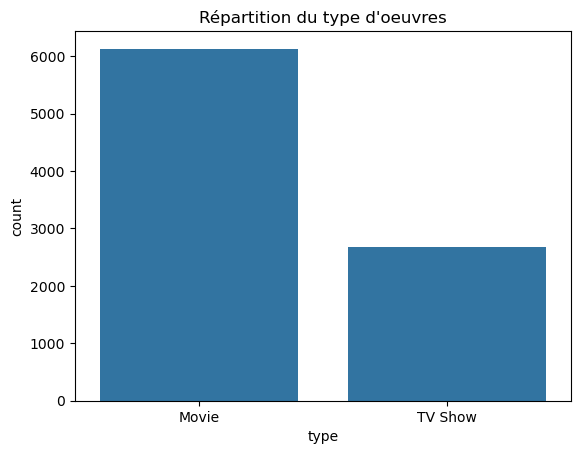

In [265]:
sns.countplot(x='type', data=df)
plt.title("Répartition du type d'oeuvres")
plt.show()


### a. Répartition du type d'œuvres
On visualise la distribution des types d'œuvres (films vs séries) dans le dataset.


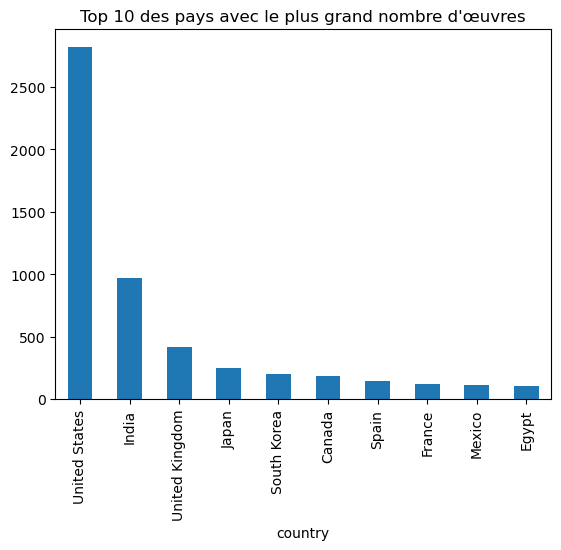

In [268]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 des pays avec le plus grand nombre d'œuvres")
plt.show()


### b. Répartition des œuvres en fonction des pays
On visualise le top 10 des pays avec le plus grand nombre d'œuvres présentes sur Netflix.


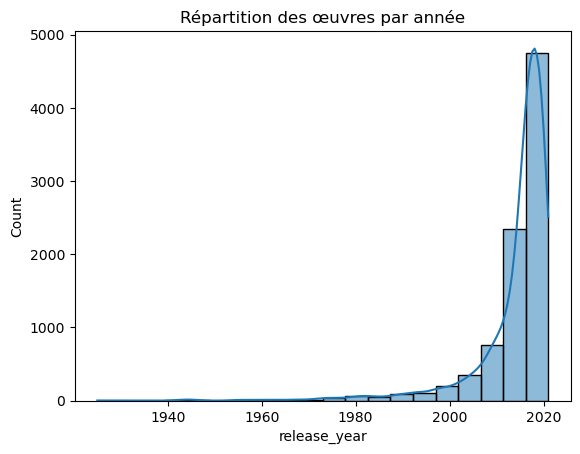

In [271]:
sns.histplot(df['release_year'], bins=20, kde=True)
plt.title("Répartition des œuvres par année")
plt.show()


### c. Répartition des œuvres par année
Ici, on affiche la répartition des œuvres de Netflix en fonction des années de sortie.


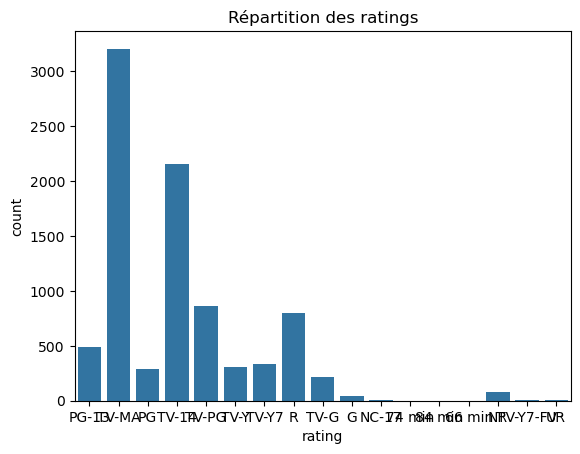

In [274]:
sns.countplot(x='rating', data=df)
plt.title("Répartition des ratings")
plt.show()


### d. Répartition des ratings
On visualise la répartition des différents ratings dans le dataset pour voir les classifications des œuvres.


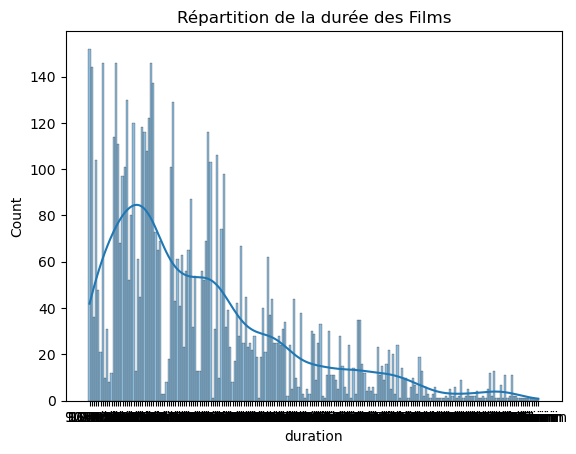

In [321]:
sns.histplot(df[df['type'] == 'Movie']['duration'], kde=True)
plt.title("Répartition de la durée des Films")
plt.show()

### e. Répartition de la durée des films
Ici, on analyse la répartition de la durée des films sur Netflix.


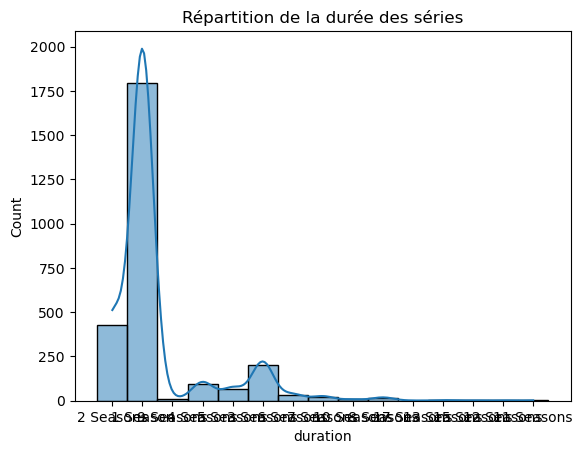

In [284]:
sns.histplot(df[df['type'] == 'TV Show']['duration'], kde=True)
plt.title("Répartition de la durée des séries")
plt.show()


### f. Répartition de la durée des séries
On observe la répartition de la durée des séries en fonction du nombre de saisons.


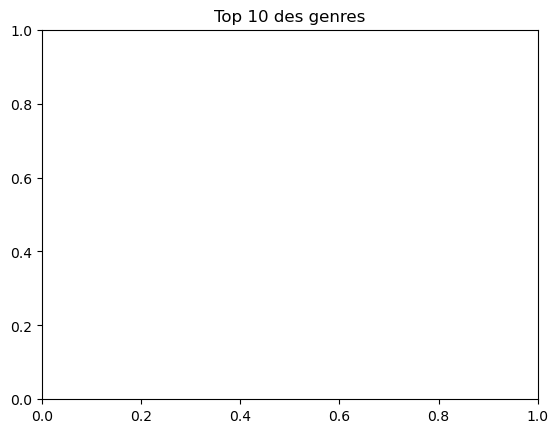

In [329]:
top_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Set2')
plt.title("Top 10 des genres")
plt.show()


### g. Répartition des genres d'œuvres
On visualise les genres les plus populaires parmi les œuvres présentes sur Netflix.


In [331]:

films = df[df['type'] == 'Movie']

C:\Users\Dehlia\AppData\Local\Temp\ipykernel_4732\1697788815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies['duration_movie'], y=top_movies['title'], palette='rocket')


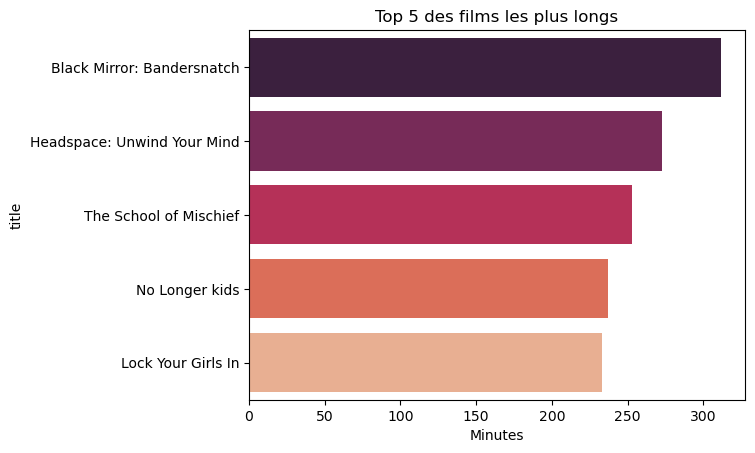

In [343]:
top_movies = films.sort_values(by='duration_movie', ascending=False).head(5)
sns.barplot(x=top_movies['duration_movie'], y=top_movies['title'], palette='rocket')
plt.title("Top 5 des films les plus longs")
plt.xlabel("Minutes")
plt.show()

### h. Top 5 des films les plus longs
On présente les 5 films les plus longs selon leur durée en minutes.


In [335]:
series = df[df['type'] == 'TV Show']


C:\Users\Dehlia\AppData\Local\Temp\ipykernel_4732\2209783360.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_series['duration_show'], y=top_series['title'], palette='viridis')


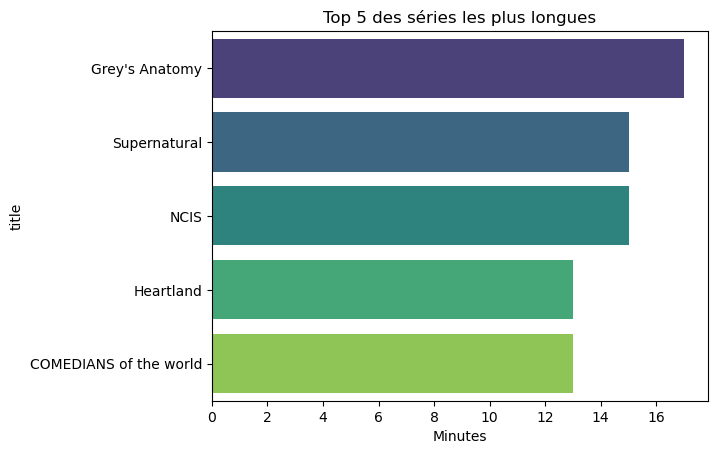

In [341]:
top_series = series.sort_values(by='duration_show', ascending=False).head(5)
sns.barplot(x=top_series['duration_show'], y=top_series['title'], palette='viridis')
plt.title("Top 5 des séries les plus longues")
plt.xlabel("Minutes")
plt.show()

### i. Top 5 des séries les plus longues
On affiche les 5 séries les plus longues en fonction du nombre de saisons.


C:\Users\Dehlia\AppData\Local\Temp\ipykernel_4732\866019058.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fr_directors.values, y=fr_directors.index, palette='flare')


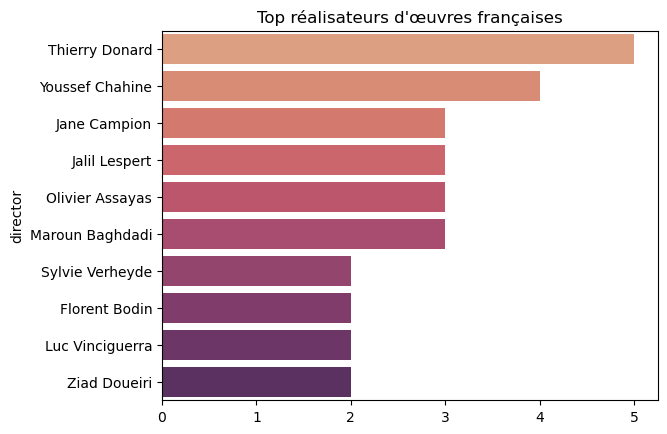

In [300]:
fr_directors = df[df['country'].str.contains('France', na=False)]['director'].dropna().value_counts().head(10)
sns.barplot(x=fr_directors.values, y=fr_directors.index, palette='flare')
plt.title("Top réalisateurs d'œuvres françaises")
plt.show()


### j. Répartition des réalisateurs des œuvres françaises
On montre les réalisateurs les plus populaires pour les œuvres françaises sur Netflix.


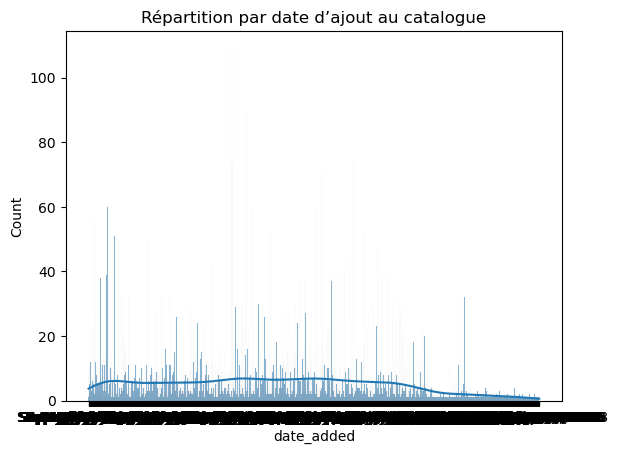

In [308]:
sns.histplot(df['date_added'].dropna(), bins=30, kde=True)
plt.title("Répartition par date d’ajout au catalogue")
plt.show()

### k. Répartition des œuvres par date d'ajout
On observe comment les œuvres ont été ajoutées à Netflix au fil du temps.


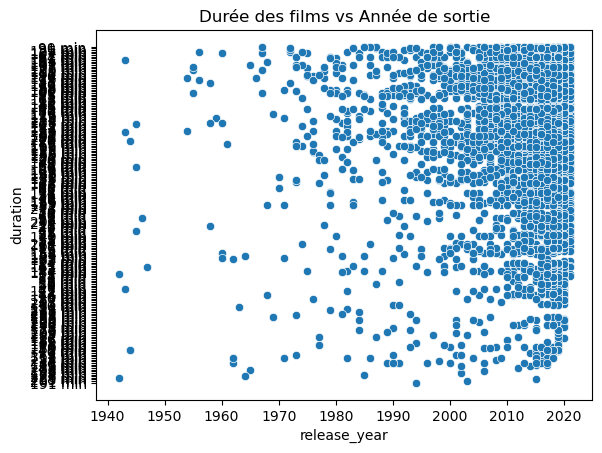

In [351]:
sns.scatterplot(x='release_year', y='duration', data=df[df['type'] == 'Movie'])
plt.title("Durée des films vs Année de sortie")
plt.show()


### l. Autre graphique pertinent
Ici, un exemple de graphique pour visualiser la relation entre la durée des films et leur année de sortie.
